# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

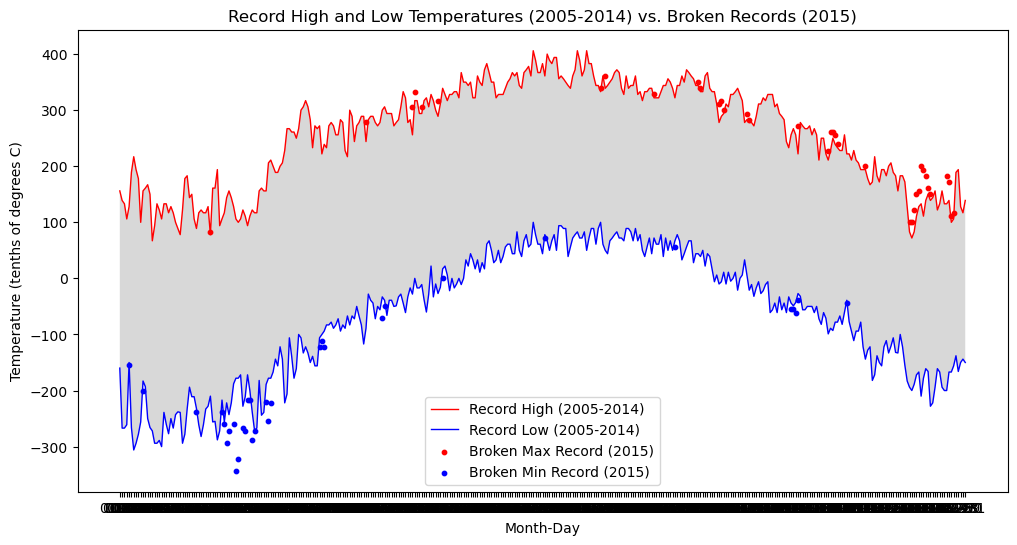

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 


# DataFrame
df = pd.read_csv('../data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Convertir la columna 'Date' 
df['Date'] = pd.to_datetime(df['Date'])

# Eliminar los  29 de febrero
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# Extraer el año de la columna 'Date'
df['Year'] = df['Date'].dt.year

# Crear columnas para 'Year' y 'Month-Day'
df['Month-Day'] = df['Date'].dt.strftime('%m-%d')

# Filtrar los datos para el período 2005-2014
df_filtered = df[(df['Year'] >= 2005) & (df['Year'] <= 2014)]

# Encontrar las temperaturas máximas y mínimas récord para cada día del año
record_max_temps = df_filtered[df_filtered['Element'] == 'TMAX'].groupby('Month-Day')['Data_Value'].max()
record_min_temps = df_filtered[df_filtered['Element'] == 'TMIN'].groupby('Month-Day')['Data_Value'].min()

# Filtrar los datos para el año 2015
df_2015 = df[df['Year'] == 2015]

# Encontrar las temperaturas máximas y mínimas récord para cada día del año en 2015
record_max_temps_2015 = df_2015[df_2015['Element'] == 'TMAX'].groupby('Month-Day')['Data_Value'].max()
record_min_temps_2015 = df_2015[df_2015['Element'] == 'TMIN'].groupby('Month-Day')['Data_Value'].min()

# Encontrar los puntos para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015
break_record_max_temps = (record_max_temps_2015 > record_max_temps).values
break_record_min_temps = (record_min_temps_2015 < record_min_temps).values

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Gráfico de las temperaturas máximas récord por día del año durante el período 2005-2014
plt.plot(record_max_temps.index, record_max_temps.values, color='red', linewidth=1, label='Record High (2005-2014)')
# Gráfico de las temperaturas mínimas récord por día del año durante el período 2005-2014
plt.plot(record_min_temps.index, record_min_temps.values, color='blue', linewidth=1, label='Record Low (2005-2014)')

# Área sombreada entre las temperaturas máximas y mínimas récord de cada día
plt.fill_between(record_max_temps.index, record_max_temps.values, record_min_temps.values, facecolor='gray', alpha=0.3)

# Puntos de datos de 2015 para los cuales se superó el récord de diez años máximo o mínimo histórico
plt.scatter(record_max_temps_2015.index[break_record_max_temps], record_max_temps_2015.values[break_record_max_temps], color='red', s=10, label='Broken Max Record (2015)')
plt.scatter(record_min_temps_2015.index[break_record_min_temps], record_min_temps_2015.values[break_record_min_temps], color='blue', s=10, label='Broken Min Record (2015)')

# Etiquetas de los ejes
plt.xlabel('Month-Day')
plt.ylabel('Temperature (tenths of degrees C)')

# Título del gráfico
plt.title('Record High and Low Temperatures (2005-2014) vs. Broken Records (2015)')

# Leyenda
plt.legend(loc='lower center')

# Mostrar el gráfico
plt.show()